In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 4)

plt.style.use('dark_background')

# Create data

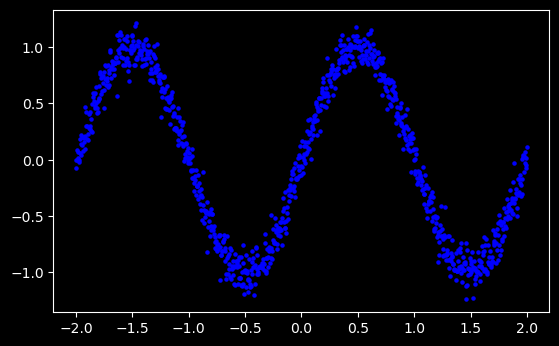

In [2]:
nPts = 1000

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# linear data
#m = 1
#b = 0
#y = m*x + b + np.random.normal(0, 0.1, nPts)

# sin data
y = np.sin(2*np.pi*x/2) + np.random.normal(0, 0.1, nPts)

# smoothe random data
#window = 30
#y = pd.Series(np.random.randn(nPts+window-1)).cumsum().rolling(window=window).mean().dropna()
#y = y / y.abs().max() * 2
#y = y.values

plt.scatter(x, y, c='b', s=5)
plt.gca().set_aspect('equal')
plt.show()

# Modeling

## Preprocessing

In [3]:
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y[:, np.newaxis])[:,0]
""";

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

## Create models

model1 has a single layer. model2 has several layers.

In [5]:
X.shape

(1000, 1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# Model 1
model = Sequential([
    Dense(1, activation='linear', input_dim=X.shape[1])
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
from tensorflow.keras.optimizers import Adam

# Model 2
model = Sequential([
    Dense(30, activation='relu', input_dim=X.shape[1]),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 901 (3.52 KB)
Trainable params: 901 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train model

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/100
25/25 [==============================] - 1s 6ms/step - loss: 0.4435 - val_loss: 0.4000
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4327 - val_loss: 0.3977
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4296 - val_loss: 0.3918
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4208 - val_loss: 0.3940
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4177 - val_loss: 0.3829
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4103 - val_loss: 0.4074
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4097 - val_loss: 0.3760
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3995 - val_loss: 0.3745
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3953 - val_loss: 0.3657
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3926 - val_loss: 0.3620
Epoch 11/

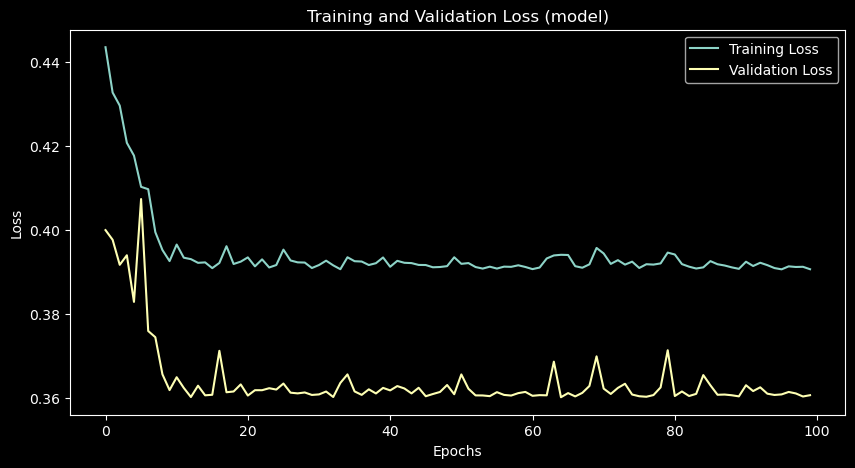

In [10]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0,max(max(history.history['loss']),max(history.history['val_loss'])))
plt.legend()

## Check model performance

In [11]:
y_pred = model.predict(X)[:,0]
y_pred[:5]

32/32 [==============================] - 0s 579us/step


array([0.0525299 , 0.06418756, 0.07584497, 0.0875026 , 0.09915999],
      dtype=float32)

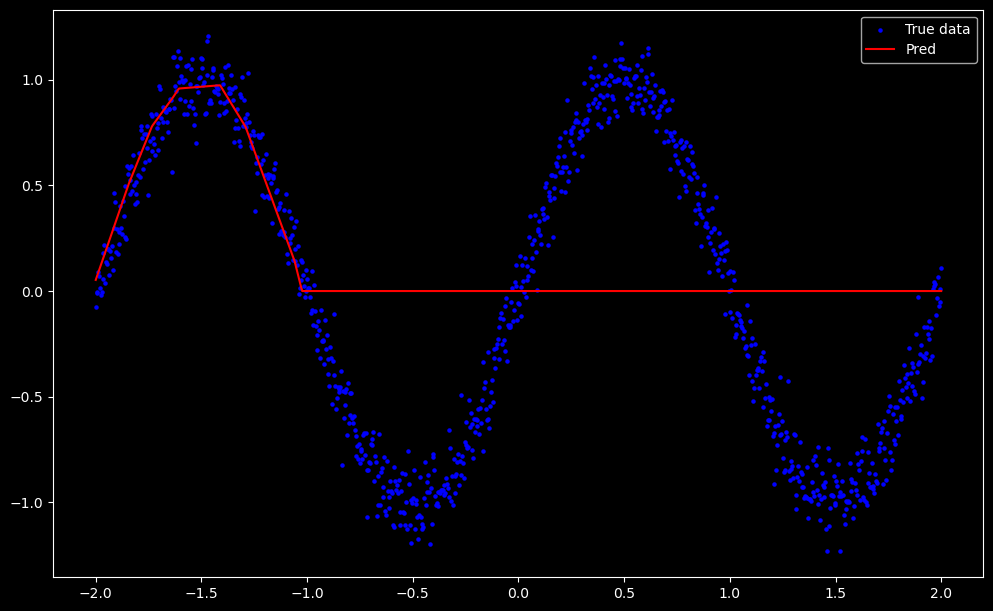

In [12]:
plt.figure(figsize=(12,12))
plt.scatter(x, y, c='b', s=5, label="True data")
plt.plot( x, y_pred, 'r', label="Pred" )
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

## Extrapolate model beyond training limits

2/2 [==============================] - 0s 2ms/step


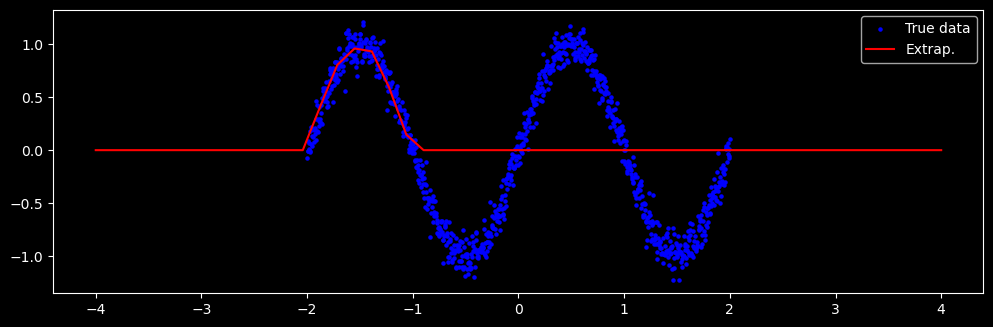

In [13]:
x_ext = np.linspace(-4,4,50)
X_ext = x_ext[:,np.newaxis]
#X_ext = X_ext % 2

y_ext = model.predict(X_ext)

plt.figure(figsize=(12,12))
plt.scatter(x, y, c='b', s=5, label="True data")
plt.plot( x_ext, y_ext, 'r', label="Extrap." )
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

## Examine model weights

In [14]:
for i, layer in enumerate(model.layers):
    print(f"Weights of layer {i}:")
    print(f'\tWeights: {layer.get_weights()[0]}')
    print(f'\tBiasess: {layer.get_weights()[1]}')
    print()
# end

Weights of layer 0:
	Weights: [[-0.2558538   0.68321395  0.24603036  0.11044922  0.3988535  -0.44189262
  -0.13622949 -0.4348779  -0.5200295   0.07190552 -0.26688844  0.2309498
  -0.3250626   0.45244858 -0.41515777 -0.18925485  0.36284408 -0.19913192
   0.3303835  -0.08729876 -0.00905652 -0.16961865 -0.14385766  0.58699244
  -0.4449675  -0.3096156   0.0362094   0.00708134  0.21671082 -0.2814538 ]]
	Biasess: [-0.25653687  0.3283096   0.14193499 -0.11282162  0.04882053 -0.432262
 -0.15851343 -0.42308986 -0.49966505 -0.1412997  -0.4286956   0.07968626
 -0.32081214  0.29648578 -0.41749933 -0.40075505  0.07076143 -0.13868573
 -0.10440406  0.03643304 -0.33977878  0.22544996 -0.300282    0.21395326
 -0.43710876 -0.5709968   0.31942338 -0.0162595  -0.2611976  -0.1260214 ]

Weights of layer 1:
	Weights: [[-2.46715635e-01 -4.44795340e-01 -2.09423468e-01 -4.51453924e-01
  -5.18375635e-02  3.88393342e-01 -2.03228012e-01  4.24085915e-01
  -4.32963312e-01 -4.63681519e-01 -2.51759082e-01 -1.64030623e